# Implementation with One Hidden Layer (From Scratch)

In [0]:
#importing important libraries
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib
import scipy
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split



In [0]:
#importing  the dataasets
from keras.datasets import fashion_mnist
(X_train,Y_train),(X_test,Y_test)=fashion_mnist.load_data()

In [0]:
Y_test_new=Y_test
X_test_new=X_test

In [150]:
Y_train=Y_train.reshape(-1,1)
X_train=X_train.reshape(60000,784)

X_test=X_test.reshape(-1,784)
Y_test=Y_test.reshape(-1,1)
Y_train.shape

(60000, 1)

In [0]:
#to make the data between 0 and 1
X_train=X_train/255
X_test=X_test/255

In [0]:
X_test, X_val, Y_test, Y_val = train_test_split(X_test, Y_test, train_size=0.50, random_state=100) #splitting the Test data according to Validate and Test

In [153]:
X_train.shape

(60000, 784)

In [154]:
Y_train.shape

(60000, 1)

In [155]:
X_val.shape

(5000, 784)

In [156]:
#y_train.shape
#y_train=np.asmatrix(y_train.T)
Y_train=Y_train.reshape(-1,1)
Y_train.shape

(60000, 1)

In [157]:
Y_test=Y_test.reshape(-1,1)
Y_test.shape

(5000, 1)

In [158]:
input_size=X_train.shape[1]
input_size

784

In [0]:
hidden_size=100


In [0]:
#to make the data of y_set onehot -flattening in 10 columns and mapping the class value with index of columns as 1 and rest of it as zero
def onehotscratch(Y_train):
    y_hotenc=np.zeros((Y_train.shape[0],10))
    for i in range(Y_train.shape[0]):
        value=Y_train[i][0]
        y_hotenc[i][value]=1
    return y_hotenc

In [0]:
Y_hotenc_train=onehotscratch(Y_train)
Y_hotenc_test=onehotscratch(Y_test)
Y_hotenc_val=onehotscratch(Y_val)

In [0]:
def sigmoid(z): #Sigmoid Function - This is actual logisitc regression function that we will be using to return predicted y as per corresponding x values
    return 1 / (1 + np.exp(-z))

def softmax(x): ##Softmax function
    e_x = np.exp(x)
    return e_x / e_x.sum(axis=1).reshape(-1,1) 


epochs_array=[]
def model_function(X_train,Y_train,epochs,learningrate,input_size,hidden_size): #the function we will be using to train the data and changing hyperparameters
    global w,b,epochs_array,learningrate_array,epochs_array,losstrack,accuracies,b1,b2,ans1
    losstrack = [] #used for generating the cost function
    accuracies=[]
    ans1=[]
    #m=X_train.shape[1]
    W1 = 0.01 * np.random.randn(input_size, hidden_size)
    W2 = 0.01 * np.random.randn(W1.shape[1],10)
    
    b1=0
    b2=0
    
    #Number of Training instances
    for epoch in range(epochs):
        z1 = np.dot(X_train, W1) + b1
        a1 = sigmoid(z1)
        z2 = np.dot(a1,W2)+b2
        a2=softmax(z2)

        
        cost = -np.sum(np.log(a2)*(Y_train),axis=1) #cross entropy
        

        losstrack.append(0.5*(np.mean(cost)))
        
        y_temp1=1-a1
        y_temp2=a2-Y_train               
                       
        delta_w2=np.dot(a1.T,y_temp2)
        multiply1=np.dot(y_temp2,W2.T)
        multiply2=a1*y_temp1
        multiply3=multiply1*multiply2
        multiply3.shape               
        delta_w1=np.dot(X_train.T,multiply3)               
                       
        W1 = W1 - learningrate * delta_w1
        #print(W1,"W1")
        W2 = W2 - learningrate * delta_w2
        #print(W2,"W2")
        
        #b = b - learningrate * db
        #epochs_array.append(epoch)
        #ans1.append(predict_function(a2))
    #accuracies.append(accuracy_check(ans1,Y_train))
    ans=predict_function(a2)
    return ans,W1,W2


 # Predict function to predict y for a generated (a2) and X_value   
def predict_function(a2):
    preds = []
    for row in a2:
        preds.append(np.argmax(row))
    return preds
  
#accuracy check
def accuracy_check(Y_predicted,Y_train):
    counts=0
    Y_Pred=(np.asarray(Y_predicted)).reshape(-1,1)
    for i in range(Y_Pred.shape[0]):
        if(Y_Pred[i]==Y_train[i]):
              counts=counts+1   
    accuracy=counts/Y_Pred.shape[0]  
    return accuracy

Accuracy with training data is:  0.8498 

Accuracy with validation data is:  0.7314 




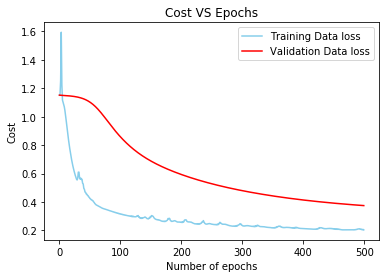

In [163]:
## Learning rate 0.00003 and epochs=800

################################ Training Data ########################################################
Y_predicted,Final_W1,Final_W2=model_function(X_train,Y_hotenc_train,500,0.00003,input_size,hidden_size)
accucheck=accuracy_check(Y_predicted,Y_train)
print("Accuracy with training data is: ",accucheck,"\n")
plt.title('Cost VS Epochs')
plt.xlabel('Number of epochs')
plt.ylabel('Cost')
plt.plot(losstrack,color='skyblue',label = "Training Data loss")
###############################Validation data###########################################
Y_predicted,Final_W1,Final_W2=model_function(X_val,Y_hotenc_val,500,0.00003,input_size,hidden_size)
accucheck=accuracy_check(Y_predicted,Y_val)
print("Accuracy with validation data is: ",accucheck,"\n\n")
predicted_Y_val=(predict_function(X_val))
plt.plot(losstrack,color='red',label = "Validation Data loss")
plt.legend()


Accuracy with training data is:  0.8670666666666667 

Accuracy with validation data is:  0.7684 




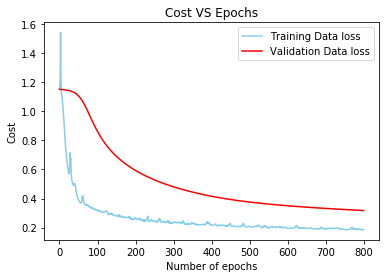

In [164]:
## Learning rate 0.00003 and epochs=800
################################ Training Data ########################################################
Y_predicted,Final_W1,Final_W2=model_function(X_train,Y_hotenc_train,800,0.00003,input_size,hidden_size)
accucheck=accuracy_check(Y_predicted,Y_train)
print("Accuracy with training data is: ",accucheck,"\n")
plt.title('Cost VS Epochs')
plt.xlabel('Number of epochs')
plt.ylabel('Cost')
plt.plot(losstrack,color='skyblue',label = "Training Data loss")
###############################Validation data###########################################
Y_predicted,Final_W1,Final_W2=model_function(X_val,Y_hotenc_val,800,0.00003,input_size,hidden_size)
accucheck=accuracy_check(Y_predicted,Y_val)
print("Accuracy with validation data is: ",accucheck,"\n\n")
predicted_Y_val=(predict_function(X_val))
plt.plot(losstrack,color='red',label = "Validation Data loss")
plt.legend()


Accuracy with training data is:  0.8710166666666667 

Accuracy with validation data is:  0.8378 




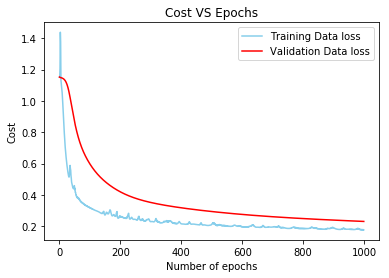

In [165]:
## Learning rate 0.00003 and epochs=1000
################################ Training Data ########################################################
Y_predicted,Final_W1,Final_W2=model_function(X_train,Y_hotenc_train,1000,0.00003,input_size,hidden_size)
accucheck=accuracy_check(Y_predicted,Y_train)
print("Accuracy with training data is: ",accucheck,"\n")
plt.title('Cost VS Epochs')
plt.xlabel('Number of epochs')
plt.ylabel('Cost')
plt.plot(losstrack,color='skyblue',label = "Training Data loss")
###############################Validation data###########################################
Y_predicted,Dummy_W1,Dummy_W2=model_function(X_val,Y_hotenc_val,1000,0.00006,input_size,hidden_size)
accucheck=accuracy_check(Y_predicted,Y_val)
print("Accuracy with validation data is: ",accucheck,"\n\n")
predicted_Y_val=(predict_function(X_val))
plt.plot(losstrack,color='red',label = "Validation Data loss")
plt.legend()


In [166]:
################################ Test Data ########################################################
#Y_predicted,Dummy_W1,Dummy_W2=model_function(X_test,Y_hotenc_test,1,0.00001,input_size,hidden_size)

z1 = np.dot(X_test, Final_W1)
a1 = sigmoid(z1)
z2 = np.dot(a1,Final_W2)
a2=softmax(z2)

Y_predicted=predict_function(a2)

accucheck=accuracy_check(Y_predicted,Y_test)
print("Accuracy with test data is: ",accucheck*100,"%")

Accuracy with test data is:  85.5 %


In [167]:
confusion_matrix(Y_test,Y_predicted)

array([[441,   1,   6,  25,   2,   2,  15,   0,   5,   0],
       [  3, 473,   1,  13,   2,   0,   1,   0,   0,   0],
       [ 10,   2, 396,   6,  70,   1,   9,   0,   5,   0],
       [ 18,   7,   5, 442,  14,   0,   3,   0,   1,   0],
       [  1,   1,  43,  20, 418,   0,  11,   0,   1,   0],
       [  0,   0,   0,   1,   0, 426,   0,  29,   0,  21],
       [112,   1,  77,  27,  69,   1, 208,   0,  14,   0],
       [  0,   0,   0,   0,   0,  10,   0, 480,   0,  22],
       [  2,   0,   3,   5,   1,   1,   1,   2, 476,   0],
       [  0,   0,   0,   0,   0,   3,   0,  18,   1, 515]])

In [168]:
target_names = ['class 0', 'class 1', 'class 2','class 3','class 4','class 5','class 6','class 7','class 8','class 9']
print(classification_report(Y_test, Y_predicted,target_names=target_names))


              precision    recall  f1-score   support

     class 0       0.75      0.89      0.81       497
     class 1       0.98      0.96      0.97       493
     class 2       0.75      0.79      0.77       499
     class 3       0.82      0.90      0.86       490
     class 4       0.73      0.84      0.78       495
     class 5       0.96      0.89      0.93       477
     class 6       0.84      0.41      0.55       509
     class 7       0.91      0.94      0.92       512
     class 8       0.95      0.97      0.96       491
     class 9       0.92      0.96      0.94       537

    accuracy                           0.85      5000
   macro avg       0.86      0.86      0.85      5000
weighted avg       0.86      0.85      0.85      5000

